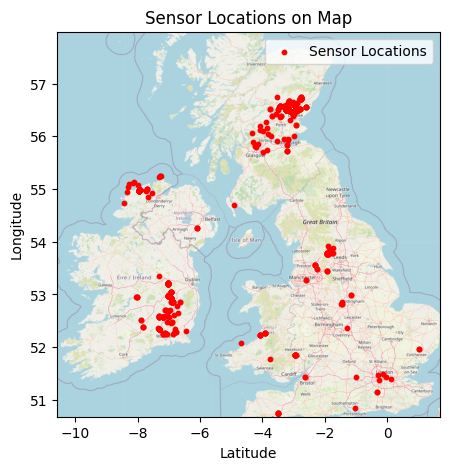

In [76]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

def read_sensor_data(file_path):
    df = pd.read_csv(file_path)
    # Filter out locations outside the correct bounding box
    df = df[(df['Latitude'] >= -10.592) & (df['Latitude'] <= 1.6848) & (df['Longitude'] >= 50.681) & (df['Longitude'] <= 57.985)]
    data = df.drop_duplicates(subset=['Latitude', 'Longitude'])
   
    
    return data

def create_geo_dataframe(data):
    geometry = [Point(xy) for xy in zip(data['Latitude'],data['Longitude'])]
    gdf = gpd.GeoDataFrame(data, geometry=geometry, crs='EPSG:4326')
    return gdf

def load_custom_map(map_path):
    map_image = plt.imread(map_path)
    return map_image

def plot_sensor_locations(gdf, map_image):
    fig, ax = plt.subplots(figsize=(5,5))
    # Get extent from the GeoDataFrame
    extent = [-10.592, 1.6848,50.681, 57.985]
    ax.imshow(map_image, extent=extent)
    gdf.plot(ax=ax, marker='o', color='red', markersize=10, label='Sensor Locations')
    plt.title('Sensor Locations on Map')
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.legend()
    plt.show()

# File paths
data_file_path = './GrowLocations.csv'
custom_map_path = './map7.png'

# Read sensor data
sensor_data = read_sensor_data(data_file_path)

# Create GeoDataFrame
if not sensor_data.empty:
    geo_dataframe = create_geo_dataframe(sensor_data)

# Load custom map
custom_map = load_custom_map(custom_map_path)

# Plot sensor locations
if custom_map is not None and not geo_dataframe.empty:
    plot_sensor_locations(geo_dataframe, custom_map)
